The dataset is from the Boston House Price with the aim to predict the mean price of a house based on several variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# load the boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['price'] = boston.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- the dataset have 13 feature columns with the PRICE column being the target variable. 
- there are no missing values present.

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# convert column names to for ease
data.columns = [n.lower() for n in data.columns]

## EDA

In [9]:
sns.set_theme(style='whitegrid')

### Unique Values

In [10]:
data.apply(lambda x:x.nunique())

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
price      229
dtype: int64

### Relationships

<AxesSubplot:>

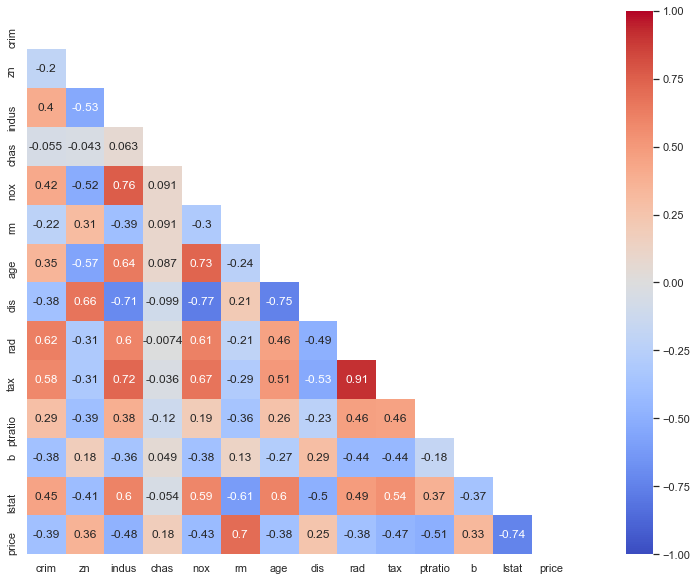

In [11]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), mask=mask, annot=True, 
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

- RAD has a very strong positive correlation with TAX.
- NOX has a very strong negative correlation with DIS.
- these are multicolinearity relationships, we need to avoid choosing these features together when creating a regression model.

<AxesSubplot:>

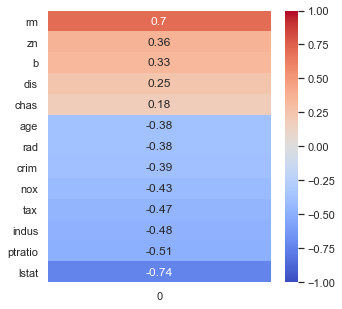

In [12]:
# correlation with target (Item_Outlet_Sales)
correlation = data.corrwith(data['price']).iloc[:-1].to_frame()

sort_correlation = correlation.sort_values(0, ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

- RM has a strong positive correlation with the PRICE of a house.
- LSTAT has a strong negative correlation with the PRICE of a house.

Text(0.5, 1.0, 'Histogram of Price')

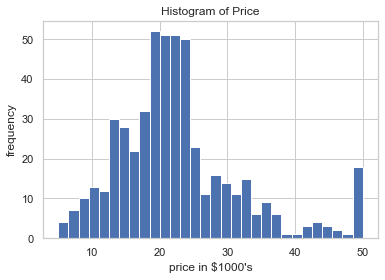

In [13]:
data['price'].hist(bins=30)
plt.xlabel("price in $1000's")
plt.ylabel('frequency')
plt.title('Histogram of Price')

- PRICE is distributed normaly with a few outliers, especially around the $50K value.

Text(0.5, 1.0, 'Price vs RM')

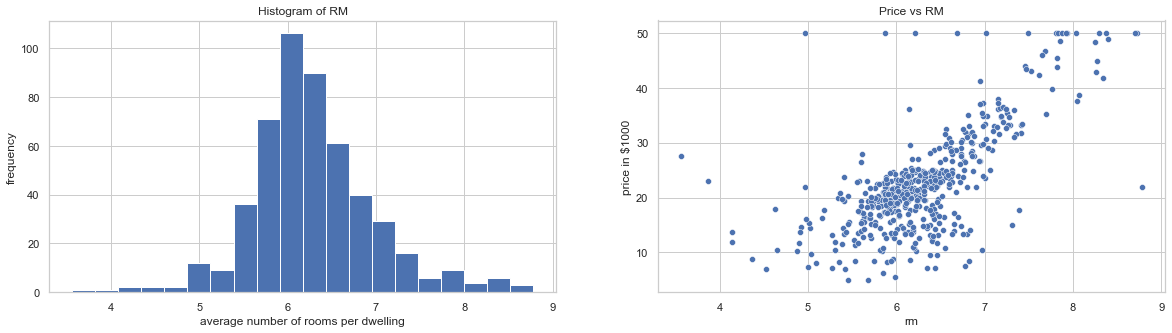

In [14]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

data['rm'].hist(bins=20, ax=axes[0])
axes[0].set_xlabel('average number of rooms per dwelling')
axes[0].set_ylabel('frequency')
axes[0].set_title('Histogram of RM')

sns.scatterplot(y='price',x='rm', data=data, ax=axes[1])
axes[1].set_ylabel('price in $1000')
axes[1].set_title('Price vs RM')

- the average number of rooms are around 6.
- the PRICE follows a linear relationship when the amount of rooms increase.
- however, there are some outliers as the price increase to the $50K value.

Text(0.5, 1.0, 'Price vs LSTAT')

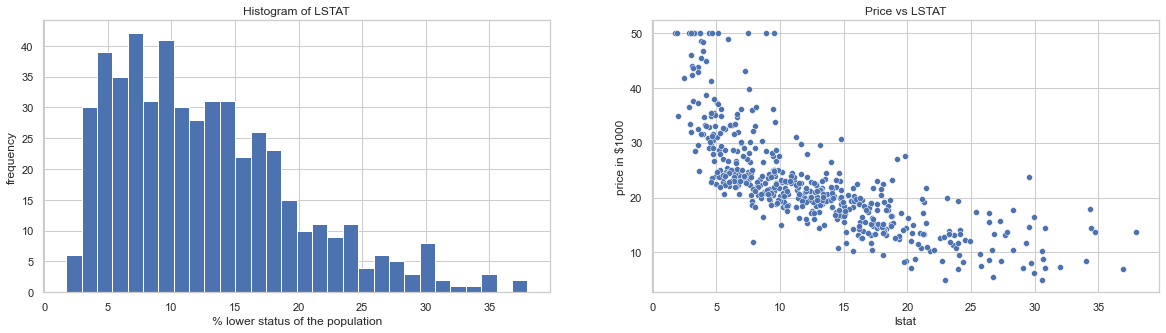

In [15]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

data['lstat'].hist(bins=30, ax=axes[0])
axes[0].set_xlabel('% lower status of the population')
axes[0].set_ylabel('frequency')
axes[0].set_title('Histogram of LSTAT')

sns.scatterplot(y='price',x='lstat', data=data, ax=axes[1])
axes[1].set_ylabel('price in $1000')
axes[1].set_title('Price vs LSTAT')

- the PRICE increase as the percentage of lower status population decrease.

## Data Preprocessing

In [16]:
X = data.drop(['price'], axis=1)

y = data['price']

- due to the small size of the dataset, it will be split 80/20.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model Selection

- the first batch of regression models will use all of the features as training data.
- the second batch will only chooses features with >0.50 correlation with the target PRICE column.
- the third batch will combine the features that have been scaled with the second batch models.
- a final model will use a XGBoost model.

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Batch 1

In [19]:
models = []

models.append(('LinReg', LinearRegression()))
models.append(('RidReg', Ridge()))
models.append(('LasReg', Lasso()))
models.append(('DTR', DecisionTreeRegressor(random_state=101)))
models.append(('RFR', RandomForestRegressor(random_state=101)))

In [20]:
# KFold use for regression
from sklearn.model_selection import KFold, cross_val_score

In [21]:
# using k-fold of 5 for cross validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LinReg: -21.665887774912512 (4.3294487869192935)
RidReg: -21.690250906318074 (4.6801105723125564)
LasReg: -26.465703908840815 (4.97820131002014)
DTR: -22.973771913580247 (2.5829655586138944)
RFR: -12.396278645061725 (4.469949334303833)


- RFR model beforms the best. Linear Regression model also can be considered.

#### Linear Regression

In [22]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

train score: 0.7513159168089282
test score: 0.7034963921813535


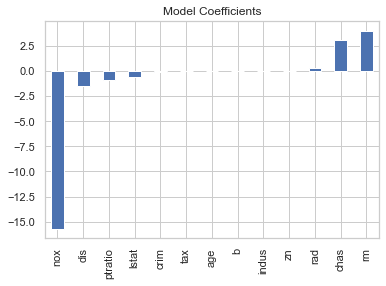

In [23]:
# model coefficients
lr.coef_

coef1 = pd.Series(lr.coef_, X.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

print(f'train score: {lr.score(X_train, y_train)}')
print(f'test score: {lr.score(X_test, y_test)}')

MAE: 3.999816437622236
MSE: 33.2650945737381
RMSE: 5.767590014359386


Text(0, 0.5, 'Predicted Y')

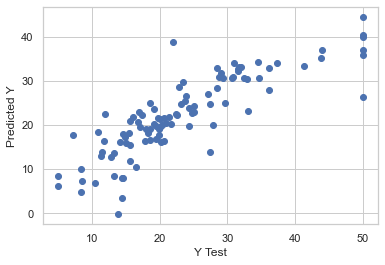

In [24]:
pred = lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

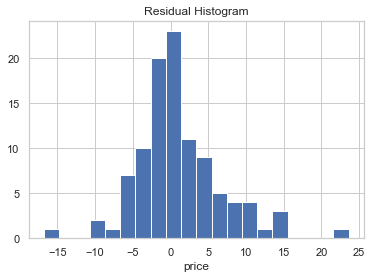

In [25]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

#### Random Forest Regressor

In [26]:
rfr = RandomForestRegressor(random_state=101)

rfr.fit(X_train, y_train)

print(f'train score: {rfr.score(X_train, y_train)}')
print(f'test score: {rfr.score(X_test, y_test)}')

train score: 0.9743289818608304
test score: 0.8424042316128698


MAE: 3.022450980392157
MSE: 17.680857843137254
RMSE: 4.204861215680876


Text(0, 0.5, 'Predicted Y')

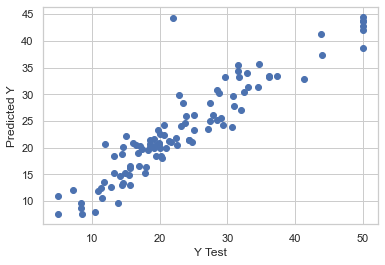

In [27]:
pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- RFR performs much better than Linear Regression Model. Let's further improve by doing some parameter tuning.

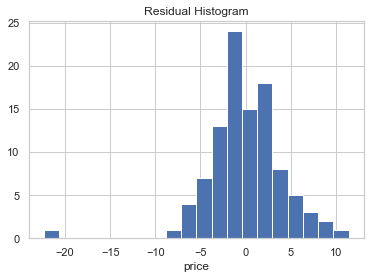

In [28]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

##### parameter tuning

In [29]:
# find max_features sqrt(13) is 4
param_grid = {'max_features': [n for n in range(1,4)]}

kfold = KFold(n_splits=5, random_state=101, shuffle=True)

In [30]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=101), param_grid=param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [31]:
grid_search.best_params_

{'max_features': 2}

In [32]:
grid_search.best_score_

0.8214725104600358

In [33]:
rfr = RandomForestRegressor(random_state=101, max_features=2)

rfr.fit(X_train, y_train)

print(f'train score: {rfr.score(X_train, y_train)}')
print(f'test score: {rfr.score(X_test, y_test)}')

train score: 0.9594137273050848
test score: 0.8333685885493662


Text(0, 0.5, 'Predicted Y')

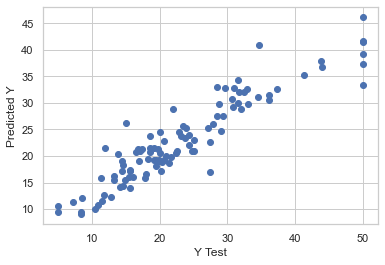

In [34]:
pred = rfr.predict(X_test)

# inverse log back
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.126176470588236
MSE: 18.69457745098039
RMSE: 4.323722638072473


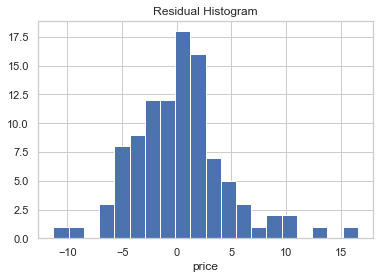

In [36]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

- not much change when the max features is set to 2.

### Batch 2

In [37]:
X2 = data[['lstat','ptratio']]

- LSTAT, PTRATIC & RM are >0.05 but due to LSTAT and RM are also highly correlated with each other, LSTAT was chosen instead because it is more correlated with the target PRICE.

In [38]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=101)

In [39]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X2_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LinReg: -30.940392693143586 (4.756052653004808)
RidReg: -30.94010929535228 (4.754317346218851)
LasReg: -31.17249639402886 (4.3470366257118584)
DTR: -35.53816759259259 (8.666592094240762)
RFR: -24.368556080332645 (6.957706061670665)


- RFR still performs better in this condition.

#### Random Forest Regressor

In [40]:
rfr = RandomForestRegressor(random_state=101)

rfr.fit(X2_train, y_train)

print(f'train score: {rfr.score(X2_train, y_train)}')
print(f'test score: {rfr.score(X2_test, y_test)}')

train score: 0.9507922693313231
test score: 0.6850375189803964


Text(0, 0.5, 'Predicted Y')

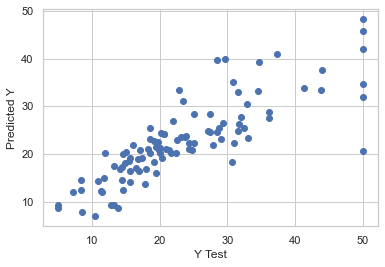

In [41]:
pred = rfr.predict(X2_test)

# inverse log back
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 4.2947058823529405
MSE: 35.336017647058824
RMSE: 5.944410622345904


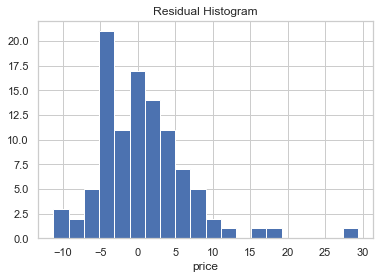

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

- the histogram does not look normally distributed.

### Batch 3

In [43]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

In [44]:
lr = LinearRegression()

lr.fit(X2_train, y_train)

print(f'Training score: {lr.score(X2_train, y_train)}')
print(f'Test score: {lr.score(X2_train, y_train)} \n')

pred = lr.predict(X2_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Training score: 0.6076262043300669
Test score: 0.6076262043300669 

MAE: 4.61459276885385
MSE: 45.175895724734275
RMSE: 6.721301639171855


In [45]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

pipe.fit(X2_train, y_train)

print('After scaling')
print(f'Training score: {pipe.score(X2_train, y_train)}')
print(f'Test score: {pipe.score(X2_test, y_test)} \n')

pred = pipe.predict(X2_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

After scaling
Training score: 0.6076262043300669
Test score: 0.597331189330286 

MAE: 4.614592768853849
MSE: 45.17589572473427
RMSE: 6.721301639171855


- not much of a large difference when standardizing the data.

### Batch 4

In [46]:
import xgboost as xgb

In [47]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed 
# performance and efficiency gains.
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [48]:
XGReg = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree = 0.3, learning_rate = 0.1, 
                         max_depth = 5, alpha = 10, 
                         n_estimators = 10)

MAE: 8.956757524901747
MSE: 131.16759373344834
RMSE: 11.45284216836364


Text(0, 0.5, 'Predicted Y')

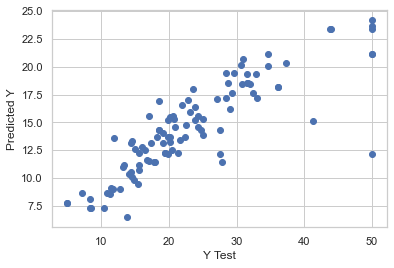

In [49]:
XGReg.fit(X_train,y_train)

pred = XGReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

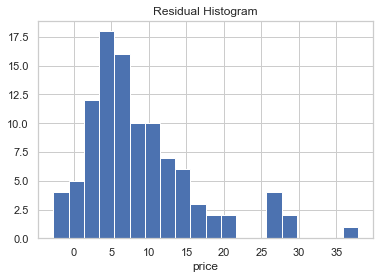

In [50]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

In [51]:
# k-folds cross-validation
params = {'objective':'reg:squarederror', 
          'colsample_bytree': 0.3, 
          'learning_rate': 0.1, 
          'max_depth': 5, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, 
                    nfold=5, num_boost_round=50, early_stopping_rounds=10, 
                    metrics='rmse', as_pandas=True, seed=101)

In [52]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.741858,0.372889,21.697987,1.651956
1,19.800425,0.357286,19.772042,1.593911
2,18.025259,0.319503,18.023746,1.509441
3,16.442957,0.264718,16.487367,1.489905
4,15.004875,0.266795,15.069511,1.365640


In [53]:
# final boosting round metric
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,2.272088,0.085733,3.912497,0.697427


- XGBoost is able to reduce the rmse to 3.913 after 50 rounds.

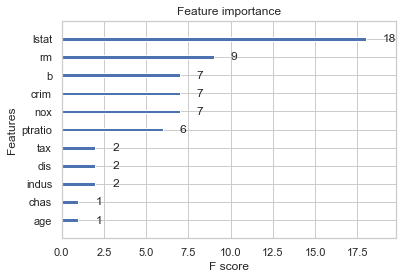

In [54]:
xgb.plot_importance(XGReg)
plt.show()

##### using linear base model

In [55]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [56]:
params = {'booster':'gblinear', 
          'objective':'reg:squarederror'}

xgb_reg = xgb.train(dtrain=train_dmatrix, params=params, 
                    num_boost_round=50)

MAE: 4.707475041408165
MSE: 42.04771947044576
RMSE: 6.484421290326976


Text(0, 0.5, 'Predicted Y')

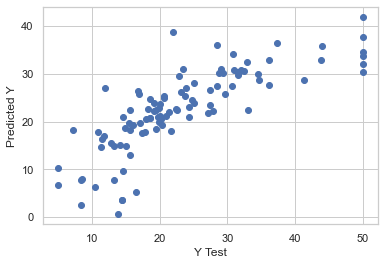

In [57]:
pred = xgb_reg.predict(test_dmatrix)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

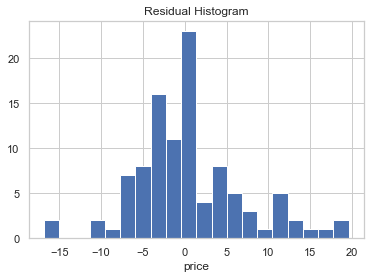

In [58]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

##### parameters tuning

In [59]:
param_grid = {'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'learning_rate': [0.1, 0.01, 0.001], 
              'max_depth': [3,5,10,15,20], 
              'alpha': [1,10,100]}

kfold = KFold(n_splits=5, random_state=101, shuffle=True)

In [60]:
grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 10, 15, 20], 'alpha': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
grid_search.best_params_

{'alpha': 1, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}

In [62]:
grid_search.best_score_

0.8592409888551539

In [63]:
params = {'objective':'reg:squarederror', 
          'colsample_bytree': 0.5, 
          'learning_rate': 0.1, 
          'max_depth': 5, 
          'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, 
                    nfold=5, num_boost_round=1000, early_stopping_rounds=10, 
                    metrics='rmse', as_pandas=True, seed=101)

In [64]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
101,0.755446,0.028294,3.168594,0.479408


Text(0, 0.5, 'RMSE Mean')

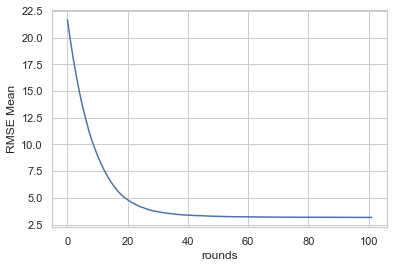

In [65]:
cv_results['test-rmse-mean'].plot()
plt.xlabel('rounds')
plt.ylabel('RMSE Mean')

- the boosting stop at 101 iteration.

In [66]:
XGReg = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree = 0.5, learning_rate = 0.1, 
                         max_depth = 5, alpha = 1, 
                         n_estimators = 101)

MAE: 2.6104431264540726
MSE: 17.717651511423252
RMSE: 4.209234076577739


Text(0, 0.5, 'Predicted Y')

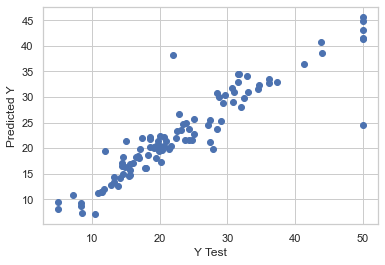

In [67]:
XGReg.fit(X_train,y_train)

pred = XGReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

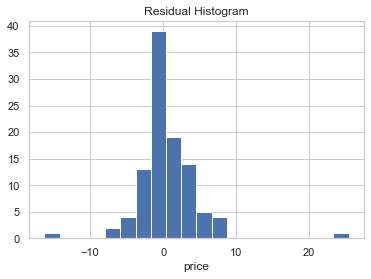

In [68]:
plt.hist(y_test-pred, bins=20)
plt.xlabel('price')
plt.title('Residual Histogram')

plt.show()

Besides XGBoost which produce the best result in terms of RMSE, the best model out of the batches would be using a Random Forest Regressor model with the hyper-parameters found.